In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(font="times",style="ticks",font_scale=1.2)
plt.rcParams['text.usetex'] = True
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
JWST = pd.read_csv("./JWST_1min.txt",header=None,usecols=[0,3,4,5],names=["time","ra","dec","delta"])
arr = np.array([[row.ra,row.dec,row.delta] for i,row in JWST.iterrows()])
t = Time(JWST.time,format="jd")
arr = np.vstack([t.to_value(format="jd"),arr.T]).T

In [3]:
Misasa = EarthLocation(lat=36.13*u.deg, lon=138.35*u.deg, height=1612.75*u.m)

In [4]:
alt = []
coord = SkyCoord(ra=arr.T[1],dec=arr.T[2],unit=[u.deg,u.deg])
altaz = coord.transform_to(AltAz(obstime=t,location=Misasa))

In [5]:
JWST_arr = np.vstack([arr.T,altaz.alt.to_value()])
np.save("./JWST_time_ra_dec_delta_alt",JWST_arr)

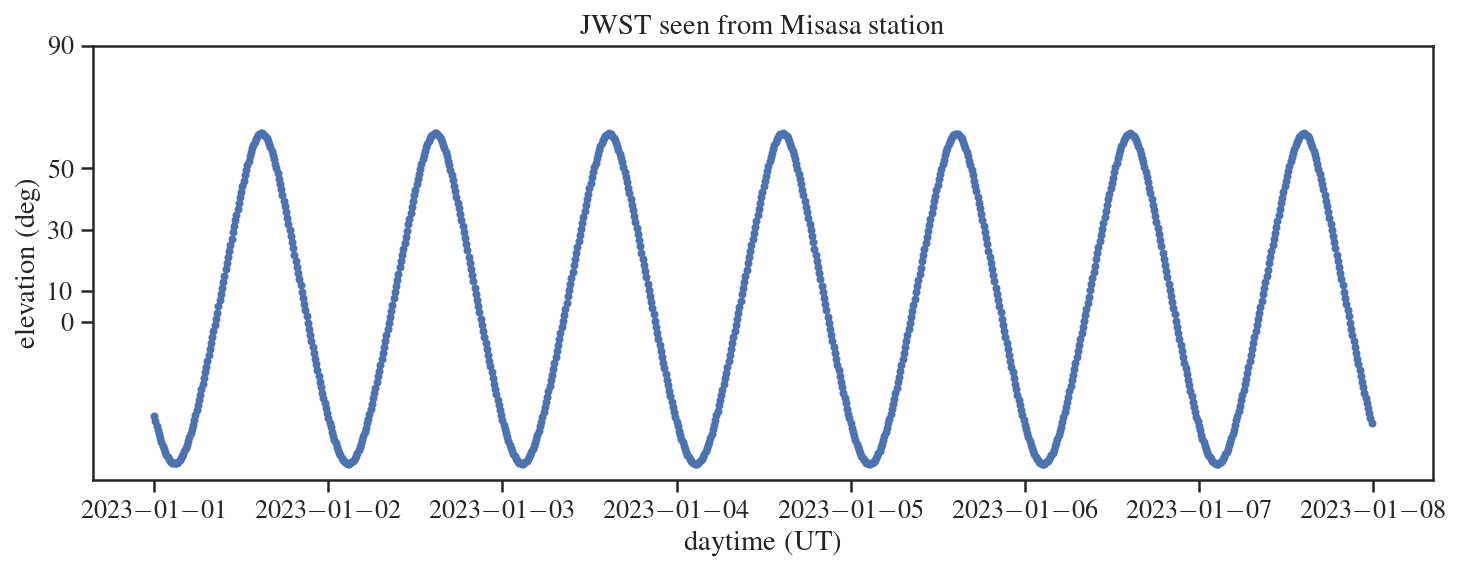

In [11]:
start = 0
end = -1
days = 7
end = start+6*24*days
fig,ax=plt.subplots(1,1,figsize=(12,4),sharex=True)
fig.subplots_adjust(hspace=0)
sc=ax.scatter(t.datetime64[start:end],JWST_arr[-1][start:end],marker=".")
              #c=JWST_arr[-2][start:end],cmap="inferno_r")
#cb = fig.colorbar(sc,ax=ax,pad=0.01)
#cb.set_label("distance (km)")
#ax.hlines(0,t.datetime64[0],t.datetime64[-1],zorder=10,color="red",ls="--")
#ax.hlines(10,t.datetime64[0],t.datetime64[-1],zorder=10,color="red",ls="--")
#ax.hlines(30,t.datetime64[0],t.datetime64[-1],zorder=10,color="red",ls="--")
#ax.set_xlim(t.datetime64[0],t.datetime64[-1])
ax.set_yticks([0,10,30,50,90])
#ax.grid()
ax.set_ylabel("elevation (deg)")
ax.set_title("JWST seen from Misasa station")
#ax.set_ylim(0,90)
#ax[1].plot(t.datetime64[start:end],JWST_arr[-2][start:end]/1e+6)
#ax[1].set_ylabel("distance ($10^6$km)")
ax.set_xlabel("daytime (UT)")
#ax[1].grid()
plt.show()

In [227]:
frac_0deg = np.sum(np.where(JWST_arr[-1]>0,1,0))#/len(JWST_arr[-1])
frac_10deg = np.sum(np.where(JWST_arr[-1]>10,1,0))#/len(JWST_arr[-1])
frac_30deg = np.sum(np.where(JWST_arr[-1]>30,1,0))#/len(JWST_arr[-1])
frac_50deg = np.sum(np.where(JWST_arr[-1]>50,1,0))#/len(JWST_arr[-1])
print("alt>0deg :%.2f (day)"%(frac_0deg/6/24))
print("alt>10deg:%.2f (day)"%(frac_10deg/6/24))
print("alt>30deg:%.2f (day)"%(frac_30deg/6/24))
print("alt>50deg:%.2f (day)"%(frac_50deg/6/24))

alt>0deg :177.01 (day)
alt>10deg:147.00 (day)
alt>30deg:84.53 (day)
alt>50deg:44.11 (day)


In [242]:
np.array(t.datetime[0])
#plt.scatter(JWST_arr[-1],JWST_arr[-2],alpha=0.1,marker=".",s=10)
#plt.hist2d(JWST_arr[-1],JWST_arr[-2],bins=10);

array(datetime.datetime(2023, 1, 1, 0, 0), dtype=object)

In [249]:
str(t.datetime64[0])

'2023-01-01T00:00:00.000000000'

In [7]:
EIRP  = 94.15 #[dBm]
EIRP_dBW = EIRP - 10*np.log10(1000) #[dBW]
D   = 1.8e+6 #[km]
Hz  = 26.675 #[GHz]
FSL = 92.45 + 20*np.log10(D) + 20*np.log10(Hz) 
#FSL = 246.1 #[dB]
GT  = 79.6 - 10*np.log10(253.2) #[dB/K]
C_N0_noa = EIRP_dBW-FSL+GT+228.6
print("GT: %.1f [dB/K]"%(GT))
print("CN0 with no attenuation: %.1f [dB]"%(C_N0_noa))
C_pc = 0.5 #[dB]
A = 7.2 #[dB]
L_p = 1.8
C_N0 = EIRP_dBW-FSL-C_pc-A-L_p+GT+228.6
print("CN0: %.1f"%(C_N0))

GT: 55.6 [dB/K]
CN0 with no attenuation: 102.2 [dB]
CN0: 92.7


Text(0, 0.5, 'relative loss (dB)')

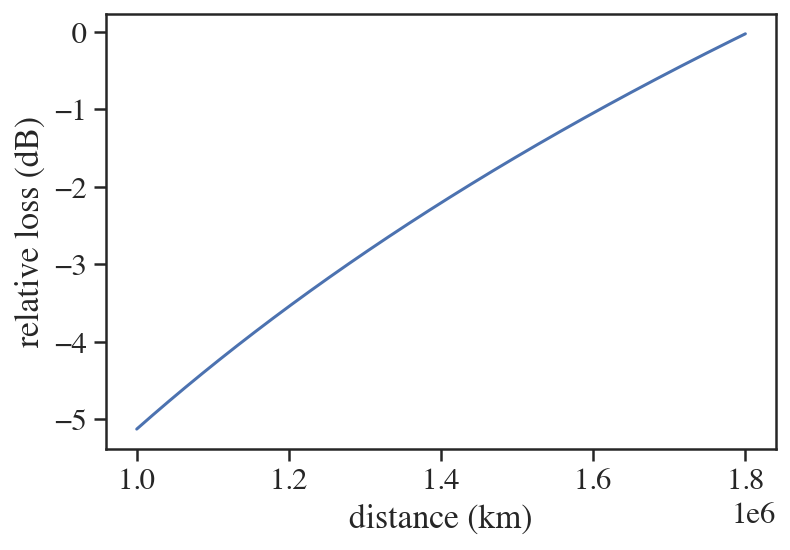

In [8]:
D = np.linspace(1e+6,1.8e+6,1000)
FSL = 92.45 + 20*np.log10(D) + 20*np.log10(Hz) 
C_N0 = EIRP_dBW-FSL-C_pc-A-L_p+GT+228.6
plt.plot(D,FSL-246.1)
plt.xlabel("distance (km)")
plt.ylabel("relative loss (dB)")